In [293]:
#Original from Christopher McCabe 8 Dec 2015, converted to python and updated by Bjoern Penning
#Read in from the mDM - mMed plane and translate to the direct detection plane
#for the vector mediator
#assumes the Lagrangian is the same as eq 2.1 of arXiv:1407.8257, see eq. 3.8 for calc
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt
import numpy as np
from array import array
import sys
import math
from scipy.interpolate import spline


In [294]:

#bunch of defintions
gDM = 1.
gSM = 1.
mn, conv_units =0.938, 2.568*pow(10.,27.)
v=246; #Higgs vev in GeV
fup, fdp = 0.0208, 0.0411; #from arXiv:1506.04142
fsp=0.043; #from arXiv:1301.1114
fTG=1-fup-fdp-fsp;

In [295]:
mmed_d=[]
mdm_d=[]
#for line in open("data/LUX1.dat"):
for line in open("data/LUX_2016_SI.dat"):
    elems = line.split();
    mDM = float(elems[0])
    sigma = float(elems[1])*conv_units
    mu_nDM=mn*mDM/(mn+mDM)
    #this is f*mMed^2
    fmMed2=(mn/v)*gSM*gDM*(fup+fdp+fsp+2./27.*fTG*3.);
    mMed=pow(fmMed2*mu_nDM,0.5)/pow(math.pi*sigma,0.25);
    mmed_d.append(float(mMed))
    mdm_d.append(float(mDM))


In [296]:
mmed_c=[]
mdm_c=[]
cntr=0
for line in open("data/atlas_scalar_in_DD_form.dat"):
    cntr=cntr+1
    if cntr in range(35, 57): #data here is odly formated, doesn't really change the shape
        continue
    elems = line.split();
    mDM = float(elems[0])
    sigma = float(elems[1])*conv_units
    mu_nDM=mn*mDM/(mn+mDM)
    #this is f*mMed^2
    fmMed2=(mn/v)*gSM*gDM*(fup+fdp+fsp+2./27.*fTG*3.);
    mMed=pow(fmMed2*mu_nDM,0.5)/pow(math.pi*sigma,0.25);
    mmed_c.append(float(mMed))
    mdm_c.append(float(mDM))
    #print str(mMed)+' '+str(mDM)

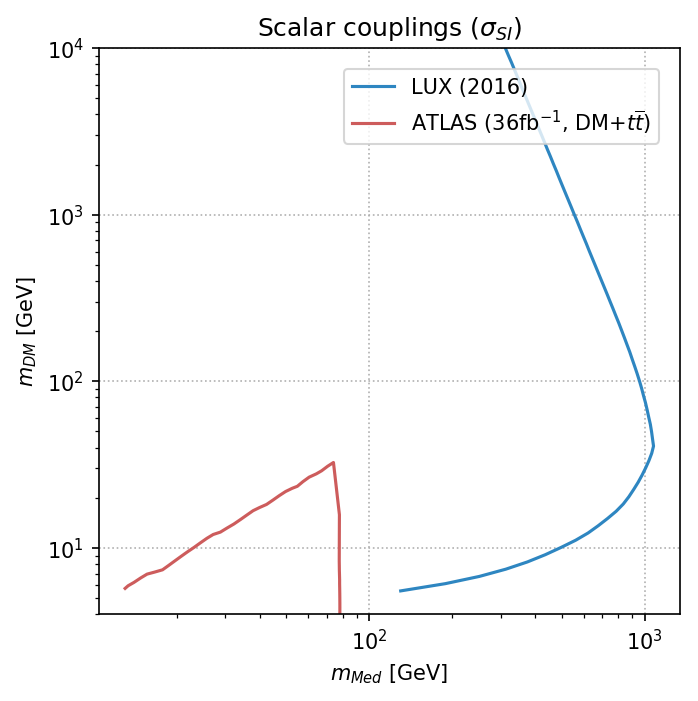

In [299]:
#mmed_ds = np.linspace(min(mmed_d), max(mmed_d), 1000)
#mdm_ds = np.linspace(min(mdm_d), max(mdm_d), 200)
#mdm_ds= spline(mmed_d, mdm_d, mdm_ds)


fig = plt.figure(figsize=(5, 5), dpi=150)
plt.title("Scalar couplings ($\sigma_{SI}$)")
plt.plot(mmed_d, mdm_d, 'k-', color='#2E86C1', label="LUX (2016)")
plt.plot(mmed_c, mdm_c, 'k-', color='#CD5C5C', label="ATLAS (36fb$^{-1}$, DM+$t\overline{t}$)")
plt.ylabel("$m_{DM}$ [GeV]")
plt.xlabel("$m_{Med}$ [GeV]")
plt.grid(linestyle='dotted')
plt.yscale("log")
plt.xscale("log")
#plt.xlim(200,1.5E5)
#plt.ylim(4,2E4)
#plt.xlim(200,700)
plt.ylim(4,10000)

plt.legend(loc=1, ncol=1, borderaxespad=01.)
#plt.savefig("Axial_LUX_update_log.pdf")
plt.show()